<a href="https://colab.research.google.com/github/shresth97/ML_repo/blob/main/Industrial_SafetyDS_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/gauravpks/ml-repo/master/IndustrialSafetyDS/industrial_safety.csv")
df

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-2016 00:00,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-2016 00:00,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
419,04-07-2017 00:00,United States,Illinois,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
420,04-07-2017 00:00,United States,Kentucky,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
421,05-07-2017 00:00,Canada,Quebec,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
422,06-07-2017 00:00,Canada,British Columbia,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [ ]:
df.head(2)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


In [ ]:
df.info

<bound method DataFrame.info of                  Data  ...                                        Description
0    01-01-2016 00:00  ...  While removing the drill rod of the Jumbo 08 f...
1    02-01-2016 00:00  ...  During the activation of a sodium sulphide pum...
2    06-01-2016 00:00  ...  In the sub-station MILPO located at level +170...
3    08-01-2016 00:00  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4    10-01-2016 00:00  ...  Approximately at 11:45 a.m. in circumstances t...
..                ...  ...                                                ...
419  04-07-2017 00:00  ...  Being approximately 5:00 a.m. approximately, w...
420  04-07-2017 00:00  ...  The collaborator moved from the infrastructure...
421  05-07-2017 00:00  ...  During the environmental monitoring activity i...
422  06-07-2017 00:00  ...  The Employee performed the activity of strippi...
423  09-07-2017 00:00  ...  At 10:00 a.m., when the assistant cleaned the ...

[424 rows x 10 columns]>

In [ ]:
df.rename(columns = {'Data' : 'Date' , 'Countries' : 'Country' , 'Employee or Third Party' : 'Employee Type'},inplace = True)

In [ ]:
df

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-2016 00:00,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-2016 00:00,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
419,04-07-2017 00:00,United States,Illinois,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
420,04-07-2017 00:00,United States,Kentucky,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
421,05-07-2017 00:00,Canada,Quebec,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
422,06-07-2017 00:00,Canada,British Columbia,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply( lambda x : x.year)
df['Month'] = df['Date'].apply( lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply( lambda x : x.day_name())
df['Weekofyear'] = df['Date'].apply(lambda x : x.weekofyear)
df.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5


In [ ]:
def month2seasons(x):
  if x in [9,10,11]:
    season = "Spring"
  elif x in [12,1,2]:
    season = "Winter"
  elif x in [3,4,5]:
    season = "Autumn"
  elif x in [6,7,8]:
      season = "Summer"
  return season 

In [ ]:
df['Season'] = df['Month'].apply(month2seasons)
df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear,Season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Winter
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Winter
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Summer
3,2016-08-01,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31,Summer
4,2016-10-01,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39,Spring


In [ ]:
# EXPLORATORY DATA ANALYSIS 

In [ ]:
#ACCIDENT BY COUNTRY 

df['Country'].value_counts()

United States     251
Canada            129
Mexico             44
Name: Country, dtype: int64

In [ ]:
country_cnt = np.round((df['Country'].value_counts(normalize = True)* 100 ))  # .round() = rounds of the value and then gives a round off floating point value 
country_cnt

United States     59.0
Canada            30.0
Mexico            10.0
Name: Country, dtype: float64

In [ ]:
type(country_cnt)

pandas.core.series.Series

In [ ]:
percent = country_cnt.to_numpy()
country = country_cnt.keys().values

percent
country

array(['United States ', 'Canada', 'Mexico'], dtype=object)

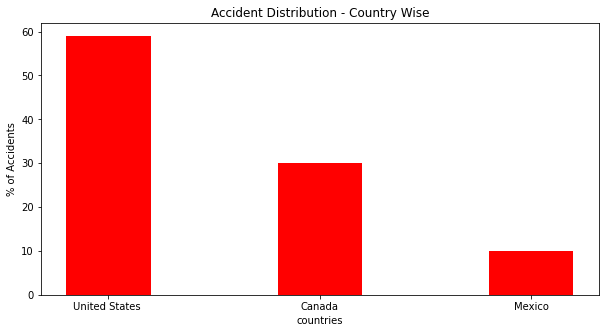

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.bar(country, percent, color = 'red', width = 0.4)
plt.xlabel("countries")
plt.ylabel("% of Accidents")
plt.title("Accident Distribution - Country Wise")
plt.show()

In [ ]:
#Accident by local

local_cnt = np.round(df['Local'].value_counts(normalize = True) * 100 )
local_cnt 

Kentucky             21.0
British Columbia     14.0
West Virginia        13.0
Illinois             13.0
Pennsylvania         11.0
Mexico City          10.0
Ontario               6.0
Alberta               6.0
Manitoba              4.0
Quebec                1.0
Yukon                 1.0
Montana               0.0
Name: Local, dtype: float64

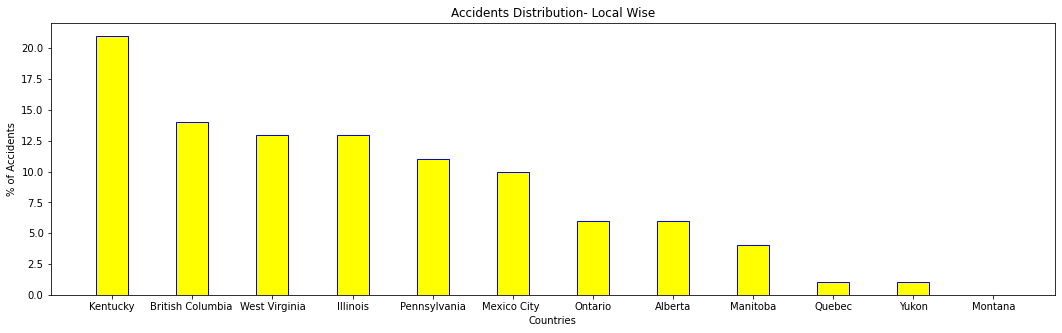

In [ ]:
fig = plt.figure(figsize = (18,5))
plt.bar(local_cnt.keys().values, local_cnt.to_numpy(), color = 'yellow', width = 0.4, edgecolor = 'blue')
plt.xlabel("Countries")
plt.ylabel("% of Accidents")
plt.title("Accidents Distribution- Local Wise")
plt.show()

In [ ]:
#ACCIDENT BY SECTOR 

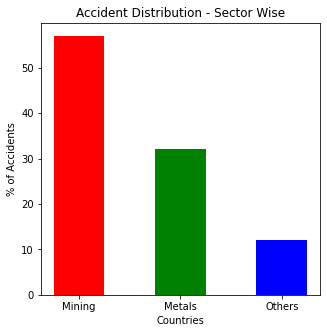

In [ ]:
sector_cnt = np.round(df['Industry Sector'].value_counts(normalize = True) * 100)
fig = plt.figure(figsize = (5,5))
plt.bar(sector_cnt.keys().values, sector_cnt.to_numpy(), color = ['red', 'green', 'blue'],width = 0.5)
plt.xlabel("Countries")
plt.ylabel("% of Accidents")
plt.title("Accident Distribution - Sector Wise")
plt.show()

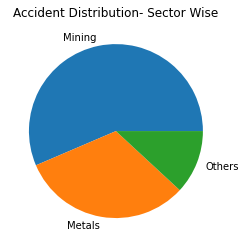

In [ ]:
plt.pie(sector_cnt.to_numpy(), labels = sector_cnt.keys().values)
plt.title("Accident Distribution- Sector Wise")
plt.show()

In [ ]:
#BY ACCIDENT lEVEL

In [ ]:
ac_level_cnt = np.round(df["Accident Level"].value_counts(normalize = True)* 100)
pot_ac_level_cnt = np.round(df['Potential Accident Level'].value_counts(normalize = True) * 100, decimals = 1)

In [ ]:
ac_level_cnt

I      74.0
II      9.0
III     7.0
IV      7.0
V       2.0
Name: Accident Level, dtype: float64

In [ ]:
pot_ac_level_cnt

IV     33.7
III    25.0
II     22.2
I      11.6
V       7.3
VI      0.2
Name: Potential Accident Level, dtype: float64